In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("musteri.csv")

In [3]:
data.head()

,musteri,cinsiyet,yaş,gelir,harcamapuan
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
X=data.iloc[:,[3,4]].values

In [5]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

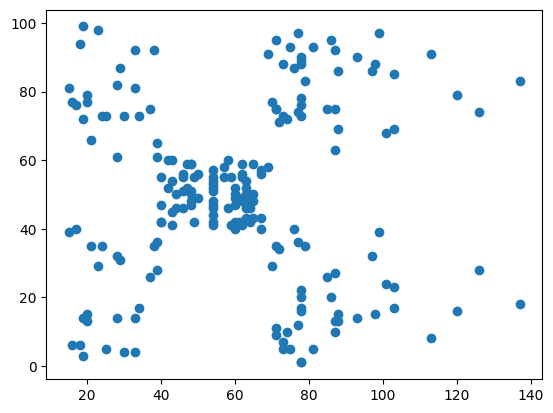

In [6]:
plt.scatter(data["gelir"],data["harcamapuan"])

In [7]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,14):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

c:\Users\ipek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ipek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ipek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ipek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

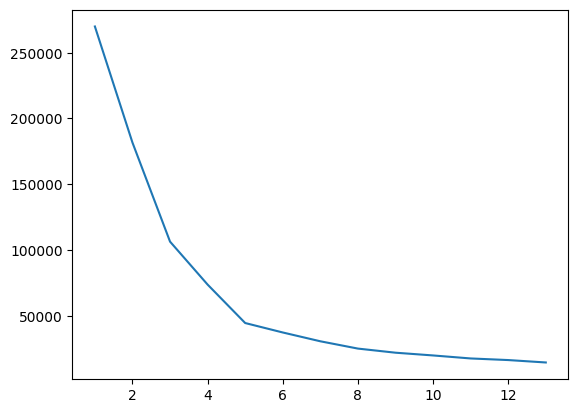

In [8]:
plt.plot(range(1,14),wcss)   #when we look at the graph, we see that the breaking point (elbow method) is at 5 (sharper than 3), so we can take the k value as 5.

In [9]:
kmeans=KMeans(n_clusters=5)
yhead=kmeans.fit_predict(X)

c:\Users\ipek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


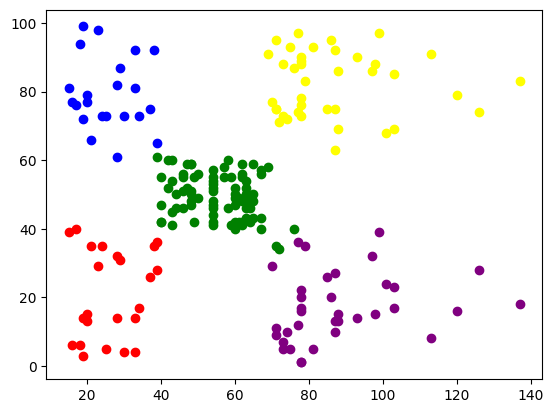

In [10]:
plt.scatter(X[yhead==0,0],X[yhead==0,1],color="red")
plt.scatter(X[yhead==1,0],X[yhead==1,1],color="yellow")
plt.scatter(X[yhead==2,0],X[yhead==2,1],color="blue")
plt.scatter(X[yhead==3,0],X[yhead==3,1],color="green")
plt.scatter(X[yhead==4,0],X[yhead==4,1],color="purple")

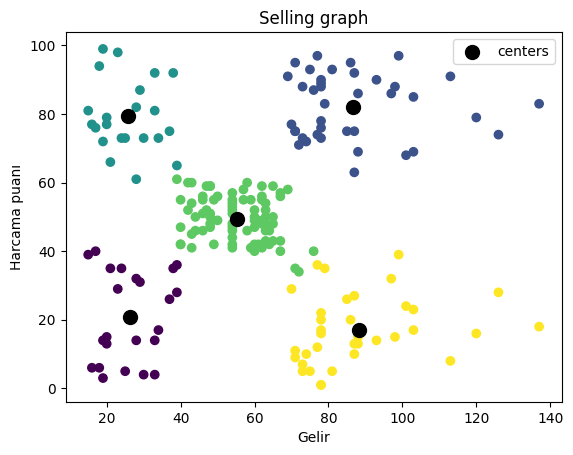

In [13]:
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_)   #automatic coloring
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=100,c="black",label="centers")    
plt.title("Selling graph")
plt.xlabel("Gelir")
plt.ylabel("Harcama puanı")
plt.legend()
plt.show()

In [14]:
kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1]

(array([26.30434783, 86.53846154, 25.72727273, 55.2962963 , 88.2       ]),
 array([20.91304348, 82.12820513, 79.36363636, 49.51851852, 17.11428571]))

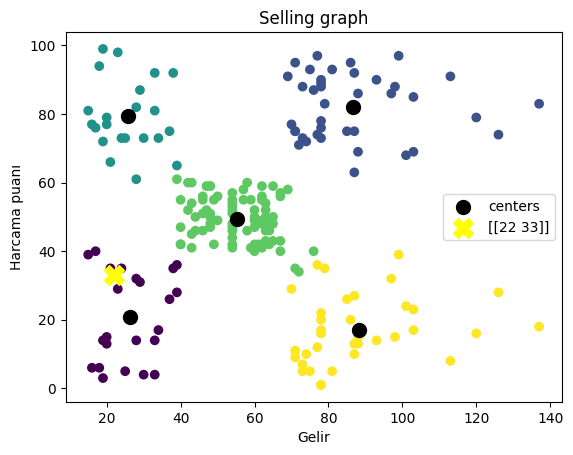

In [21]:
manuel_value=np.array([[22,33]])     #we calculate which cluster a 22-year-old person with 33 expenditure points is in
cluster_no=kmeans.predict(manuel_value)
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_) 
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=100,c="black",label="centers") 
plt.scatter(manuel_value[:,0],manuel_value[:,1],s=200,c="yellow",marker="X",label=manuel_value)
plt.title("Selling graph")
plt.xlabel("Gelir")
plt.ylabel("Harcama puanı")
plt.legend()
plt.show()
